### 필수과제3 데이터 분석 보고서 작성
- 고객 장바구니 데이터
- 기한: 2023년 1월 첫수업 진행 전까지
- 분석 방향: 시계열 데이터를 만들고 다양한 인사이트를 도출해 주세요!
- 응용 분석 가능하신 분: RFM, 장바구니 분석(apriori, Fb-growth), 비지도학습(클러스터링, k-means, gmm), 시각화 필수!
- 주의사항: 코드 작성 후 주석처리 필수, 본인의 코드에 대한 이해를 가지고 인사이트를 꼭 적어주셔야 합니다!

### sales_data 파일 읽기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import missingno as msno

In [3]:
sales = pd.read_csv("sales_data.csv", encoding="unicode_escape")

In [4]:
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- 8개 변수(컬럼)으로 구성된 데이터
- InvoiceDate는 시계열 데이터로, 따로 시계열 타입으로 변환해야함
- Quantity(수량), UnitPrice(개당 가격), Country(국가) 중심으로 분석을 시도하고자 함
- Quantity(수량)와 UnitPrice(개당 가격)를 따로 보기보다는, 이 둘을 곱한 새로운 컬럼 TotalPrice(총 가격)을 만들어서 분석을 하는 것이 좋아보임

### 데이터 전처리
- 결측치를 확인하고, 필요에 따라 제거함
- 이상치를 확인하고, 필요에 따라 제거함
- TotalPrice(총 가격) 컬럼 생성 (총 가격 = 수량 * 개당 가격)
- 시계열 데이터의 타입을 변경함
- 시계열 데이터를 인덱스로 설정한 데이터프레임 생성

In [6]:
# 결측치(누락값) 확인
sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

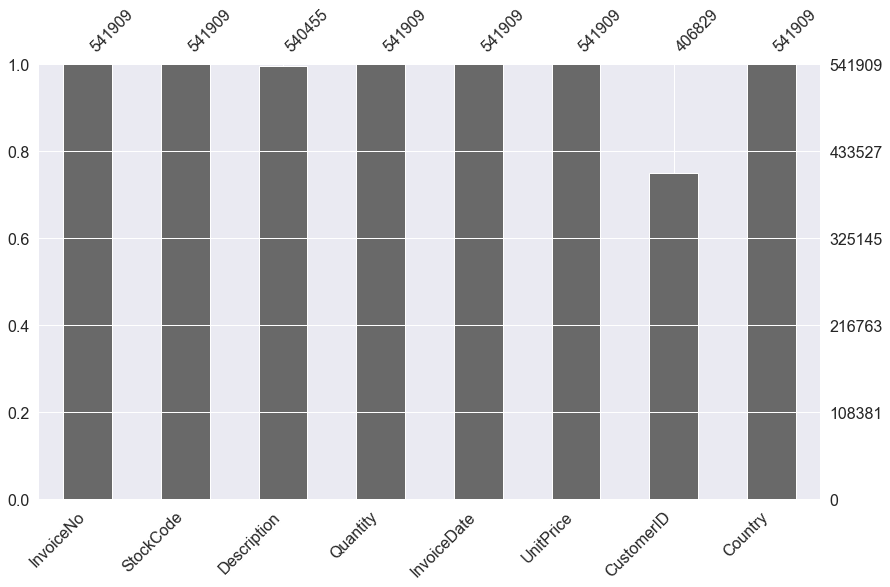

In [7]:
# 결측치 시각화
sns.set()
msno.bar(df=sales, figsize=(14,8))

<AxesSubplot:>

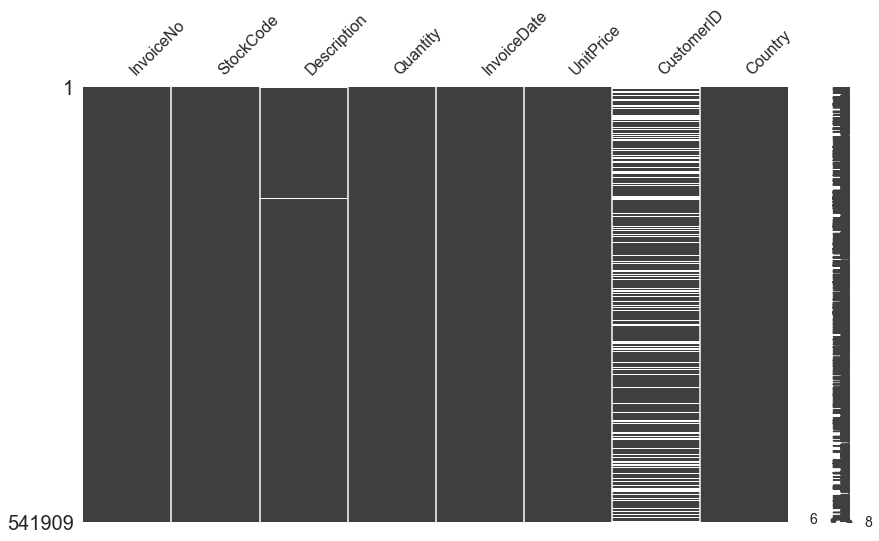

In [8]:
msno.matrix(df=sales, figsize=(14,8))

- Description, CustomerID 변수에 결측치가 확인됨
- CustomerID의 경우 결측치가 20%를 넘김

In [9]:
# Description이 결측치인 데이터 보기
display(sales.query("Description.isnull()").head())
display(sales.query("Description.isnull()").sample(5))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
383321,570013,21395,NaN,-38,10/7/2011 9:55,0.0,NaN,United Kingdom
140211,548385,22168,NaN,-19,3/30/2011 16:47,0.0,NaN,United Kingdom
244261,558477,84597C,NaN,-1,6/29/2011 16:04,0.0,NaN,United Kingdom
173327,551691,18098C,NaN,10,5/3/2011 13:36,0.0,NaN,United Kingdom
233769,557486,22084,NaN,44,6/20/2011 14:42,0.0,NaN,United Kingdom


In [10]:
print(sales.query("Description.isnull()").InvoiceNo.count())
print(sales.query("Description.isnull() and UnitPrice == 0").InvoiceNo.count())
print(sales.query("Description.isnull() and CustomerID.isnull() and UnitPrice == 0").InvoiceNo.count())
# Description가 결측치인 데이터는 전부 UnitPrice가 0이고 CustomerID도 결측치이다.
# 데이터의 해석이 어렵고, 정상적인 데이터라고 보기 힘들다.

1454
1454
1454


In [11]:
# CustomerID가 결측치인 데이터 보기
display(sales.query("CustomerID.isnull()").head())
display(sales.query("CustomerID.isnull()").sample(5))
# 대부분의 데이터가 CustomerID만 비어있고 나마저 변수는 정상인 것을 확인할 수 있다.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
30706,538877,82494l,WOODEN FRAME ANTIQUE WHITE,19,12/14/2010 15:29,8.47,NaN,United Kingdom
441203,574561,22699,ROSES REGENCY TEACUP AND SAUCER,2,11/4/2011 15:52,5.79,NaN,United Kingdom
474210,576840,22315,200 RED + WHITE BENDY STRAWS,1,11/16/2011 15:23,2.46,NaN,United Kingdom
251150,559052,21707,FOLDING UMBRELLA BLACKBLUE POLKADOT,2,7/5/2011 16:53,3.29,NaN,United Kingdom
243633,558475,16219,HOUSE SHAPE PENCIL SHARPENER,2,6/29/2011 15:58,0.83,NaN,United Kingdom


- Description이 결측치인 데이터는 비정상적인 데이터로 보이므로 분석에서 전부 제외
- CustomerID만 결측치인 데이터는 제거하지 않고 그대로 사용

In [12]:
# 결측치 제거
sales1 = sales.drop(sales[sales.Description.isnull()].index)

In [13]:
sales1.isnull().sum() # 결측치가 성공적으로 제거됨

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

<AxesSubplot:xlabel='Quantity'>

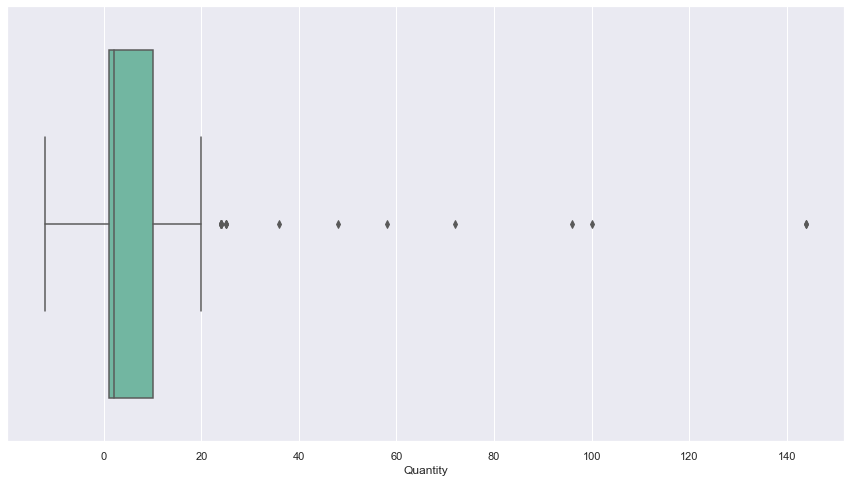

In [15]:
# Quantity 데이터 이상치 확인 
sales_s = sales1.sample(200)
sns.set_palette("Set2")
plt.figure(figsize=(15,8))
sns.boxplot(data=sales_s, x="Quantity")

<AxesSubplot:xlabel='UnitPrice'>

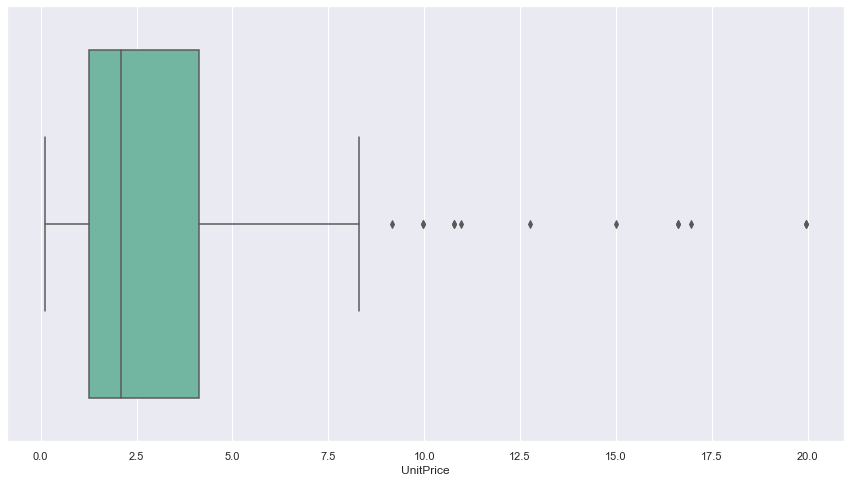

In [16]:
# UnitPrice 데이터 이상치 확인 
plt.figure(figsize=(15,8))
sns.boxplot(data=sales_s, x="UnitPrice")

- 전체 데이터의 일부(200개)만 추출해서 히스토그램을 그렸음에도 이상치가 존재함
- 그러나 수집된 데이터 특성상 불가능하거나 말이 안되는 값은 아니기에 제거하지 않고 진행
- 수량이 음수인 경우는 장바구니에서 상품을 제거한 것과 같음

In [17]:
# 총 가격(TotalPrice) 컬럼 생성
sales1["TotalPrice"] = sales1["Quantity"] * sales1["UnitPrice"]

In [18]:
# 시계열 데이터 타입 변경
sales1["InvoiceDate"] = pd.to_datetime(sales1["InvoiceDate"])

In [19]:
sales1.info() # 자료형이 성공적으로 변경됨

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
 8   TotalPrice   540455 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 41.2+ MB


In [20]:
# 인덱스를 시계열 데이터로 설정한 데이터프레임 생성
sales_dt = sales1.set_index("InvoiceDate")

In [21]:
sales_dt.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


### 데이터 시각화
- 국가(Country)별 장바구니 데이터 비율
- 월/주/2주 단위로 보는 총 가격(TotalPrice)의 분포
- 일 단위로 보는 수량(Quantity), 개당 가격(UnitPrice), 총 가격(TotalPrice)의 분포

In [22]:
# 국가별 고객 데이터 빈도표
sales_dt.Country.value_counts().to_frame()

,Country
United Kingdom,494024
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519
Australia,1259


- 다양한 국가의 장바구니 데이터가 포함되어있음
- 영국의 데이터가 압도적으로 많아보임
- 상위 4개 국가의 데이터만 남기고 나머지 국가들은 기타로 분류하여 시각화를 진행함

In [23]:
# 상위 4개 국가를 제외한 국가들은 others(기타)로 분류
country = sales_dt["Country"]
country[(country != "United Kingdom") & (country != "Germany") & 
        (country != "France") & (country != "EIRE")] = "others"

C:\Users\doram\AppData\Local\Temp\ipykernel_23436\639249321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country[(country != "United Kingdom") & (country != "Germany") &


In [24]:
country.value_counts(normalize=True).to_frame()

,Country
United Kingdom,0.914089
others,0.037344
Germany,0.017569
France,0.015833
EIRE,0.015165


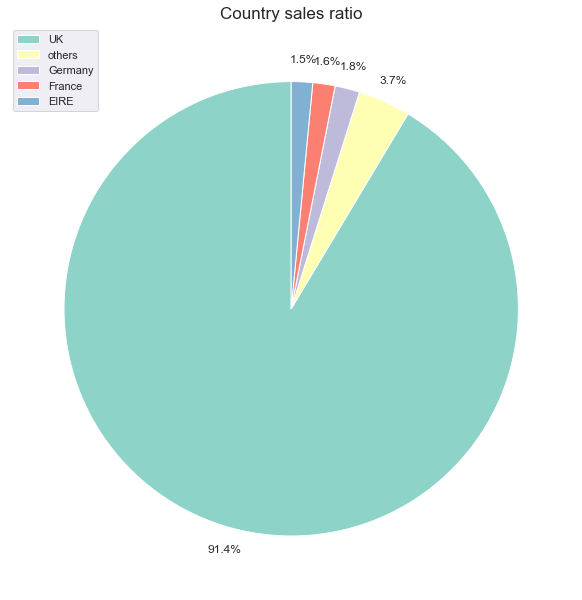

In [25]:
# Country(국가)별 고객 데이터 시각화(pie chart)
sns.set_palette("Set3")
plt.figure(figsize=(8.5,8.5))
plt.pie(country.value_counts(normalize=True), startangle=90, autopct="%.1f%%", 
        pctdistance=1.1, labeldistance=1.2)
plt.title("Country sales ratio", fontsize=17)
plt.legend(["UK","others","Germany","France","EIRE"],loc="upper left")
plt.tight_layout()

- 전체 데이터의 대부분(91.4%)를 차지하는 국가는 United Kingdom이다.
- 그 뒤로 Germany, France, EIRE(Ireland) 순으로 고객 장바구니 데이터가 많다.

In [26]:
# 월별 총 가격(TotalPrice) 총합의 변화 추이
sales_dt_ms = sales_dt.resample("M").sum()
sales_dt_ms.index

DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30',
               '2011-12-31'],
              dtype='datetime64[ns]', name='InvoiceDate', freq='M')

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

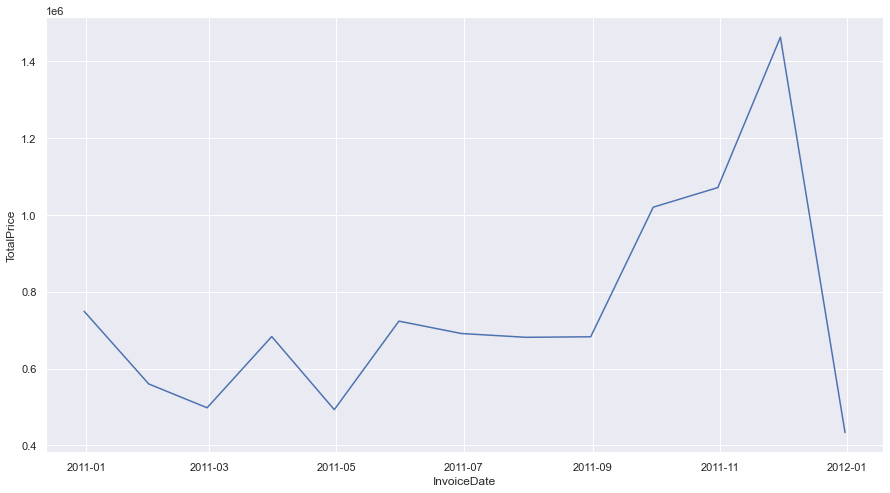

In [27]:
sns.set_palette("deep")
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_ms, x=sales_dt_ms.index, y="TotalPrice")

- 수집된 데이터는 2010년 12월 ~ 2011년 12월 데이터이다.
- 3월, 5월에는 장바구니에 담긴 총 금액이 다른 달에 비해 유의미하게 낮다.
- 1월 ~ 9월 사이에는 금액의 증가량이 크지 않았지만, 10월부터 급격하게 증가하기 시작한다.
- 장바구니 총 금액은 12월에 가장 많다.

In [28]:
# 주별 총 가격(TotalPrice) 총합의 변화 추이
sales_dt_ws = sales_dt.resample("W").sum()
sales_dt_ws.index
# 조금 더 정확한 총 금액 추이를 확인하기 위해 주별 변화를 확인해보았다.

DatetimeIndex(['2010-12-05', '2010-12-12', '2010-12-19', '2010-12-26',
               '2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06', '2011-03-13', '2011-03-20',
               '2011-03-27', '2011-04-03', '2011-04-10', '2011-04-17',
               '2011-04-24', '2011-05-01', '2011-05-08', '2011-05-15',
               '2011-05-22', '2011-05-29', '2011-06-05', '2011-06-12',
               '2011-06-19', '2011-06-26', '2011-07-03', '2011-07-10',
               '2011-07-17', '2011-07-24', '2011-07-31', '2011-08-07',
               '2011-08-14', '2011-08-21', '2011-08-28', '2011-09-04',
               '2011-09-11', '2011-09-18', '2011-09-25', '2011-10-02',
               '2011-10-09', '2011-10-16', '2011-10-23', '2011-10-30',
               '2011-11-06', '2011-11-13', '2011-11-20', '2011-11-27',
               '2011-12-04', '2011-12-11'],
              dtype='datetime64[n

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

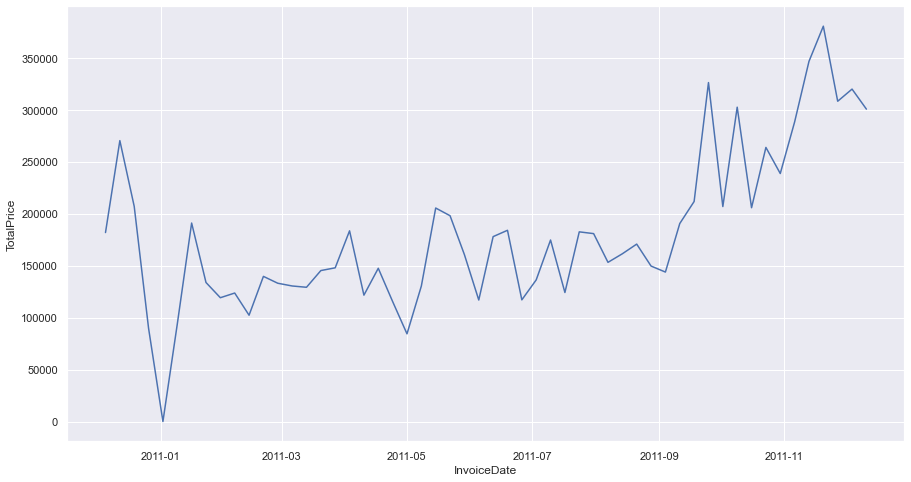

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_ws, x=sales_dt_ws.index, y="TotalPrice")

- 주 단위로 보면 월별 데이터와 비슷하게 2011년 9월까지는 변화량이 크지 않다가, 10월부터 장바구니 총 금액이 크게 상승하였다는 사실을 확인할 수 있다.
- 2011년 1월 첫 번째 주 데이터의 총 금액이 0인데, 이는 누락된 데이터가 원인으로 보인다.

In [30]:
sales_dt_ws.head()
# 실제로 12/24~1/3 데이터가 누락되어있으며, 1월 첫째주 데이터가 모두 0이다.

,Quantity,UnitPrice,CustomerID,TotalPrice
InvoiceDate,,,,
2010-12-05,80086,38727.19,122249393.0,181847.25
2010-12-12,118990,144262.85,153871225.0,270287.03
2010-12-19,105019,51191.06,111863691.0,207052.17
2010-12-26,39230,26339.75,28713439.0,89770.57
2011-01-02,0,0.00,0.0,0.00


- 누락된 데이터는 데이터 파일 안에서 아예 빠져있다.
- 또한 데이터는 주어진 기간 동안 고객이 장바구니를 사용했을 시 기록되는 형태이기 때문에 일반적인 누락값 대체 방법을 사용하기 힘들다.
- 그렇기 때문에 2주일 단위로 TotalPrice 데이터의 총합, 평균, 그리고 기록된 장바구니 사용 횟수를 시각화하고, 이들을 비교해서 시간별 고객의 장바구니 패턴을 분석하고자 한다.

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

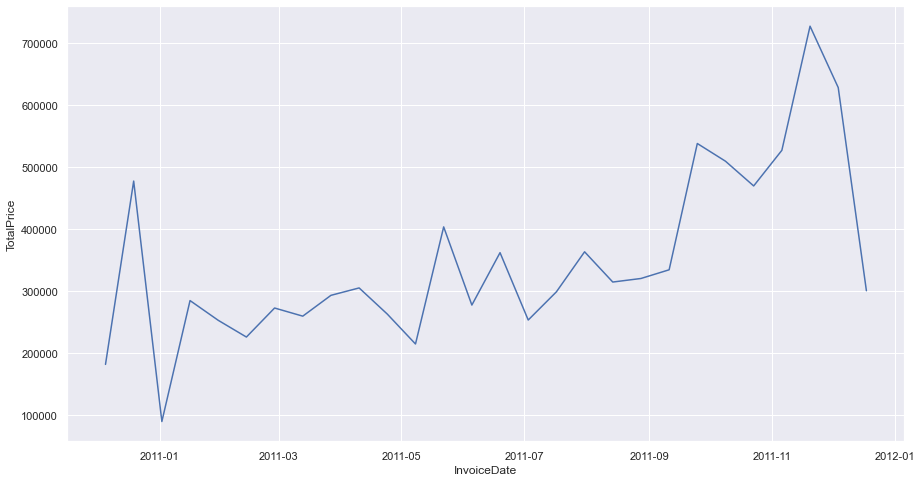

In [31]:
# 2주 당 총 가격(TotalPrice) 총합의 변화 추이
sales_dt_2ws = sales_dt.resample("2W").sum()
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_2ws, x=sales_dt_2ws.index, y="TotalPrice")

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

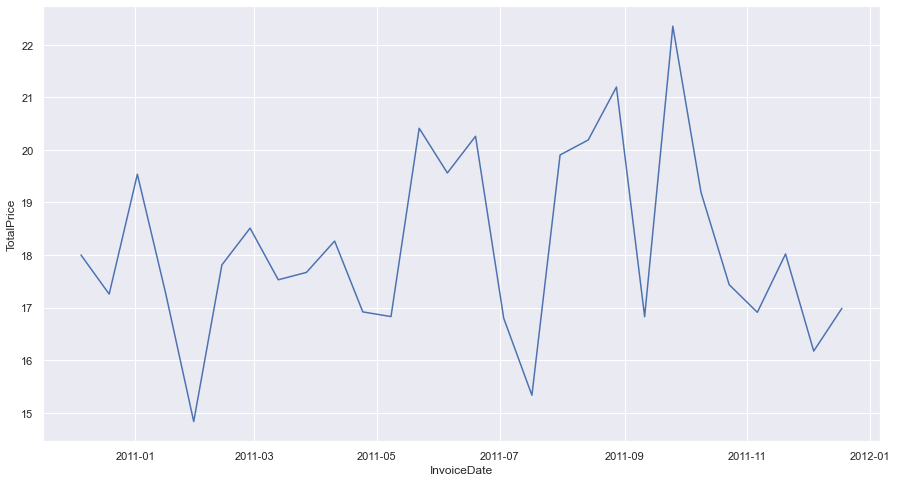

In [32]:
# 2주 당 총 가격(TotalPrice) 평균의 변화 추이
sales_dt_2wm = sales_dt.resample("2W").mean()
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_2wm, x=sales_dt_2wm.index, y="TotalPrice")

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

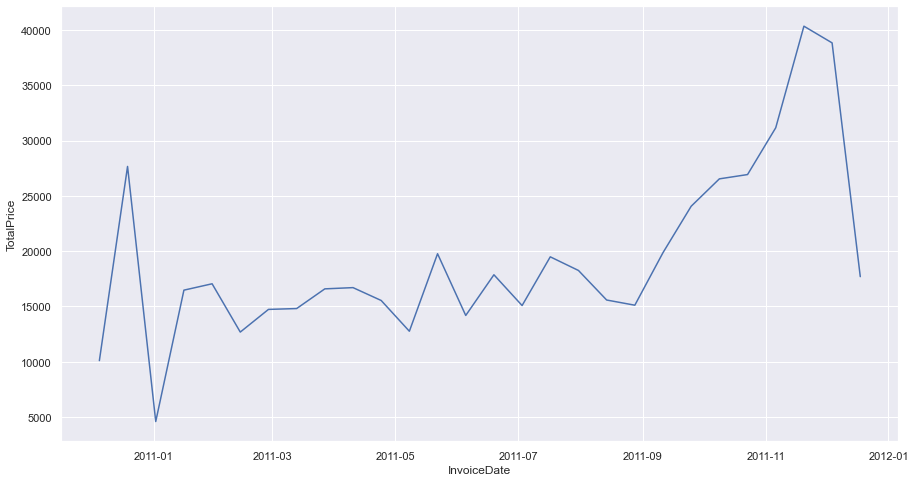

In [33]:
# 2주 당 총 장바구니 사용 횟수의 변화 추이
sales_dt_2wc = sales_dt.resample("2W").count()
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_2wc, x=sales_dt_2wc.index, y="TotalPrice")

- 2주 당 장바구니 금액 총합과 기록된 장바구니 총 사용 횟수는 비슷한 분포를 보인다.
- 그러나 장바구니 금액 평균은 총합 및 사용 횟수와 비례하지 않는다.
- 특히 1월 초반과 7-8월, 9-12월 사이에는 그래프 사이의 차이가 심하다.



- 평균 그래프를 보면 1월 말 ~ 2월 초, 그리고 7월 초중순 기간에는 평균 금액이 다른 기간에 비해 비교적 낮다.
- 그에 반해 1월 초, 5월 중순 ~ 6월 중순, 8월 말, 9월 말에는 평균 금액이 다른 기간에 비해 높다.
- 또한 9월 말 이후에는 평균 금액이 급격히 하락하면서 11-12월에도 낮은 수치가 유지된다.

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

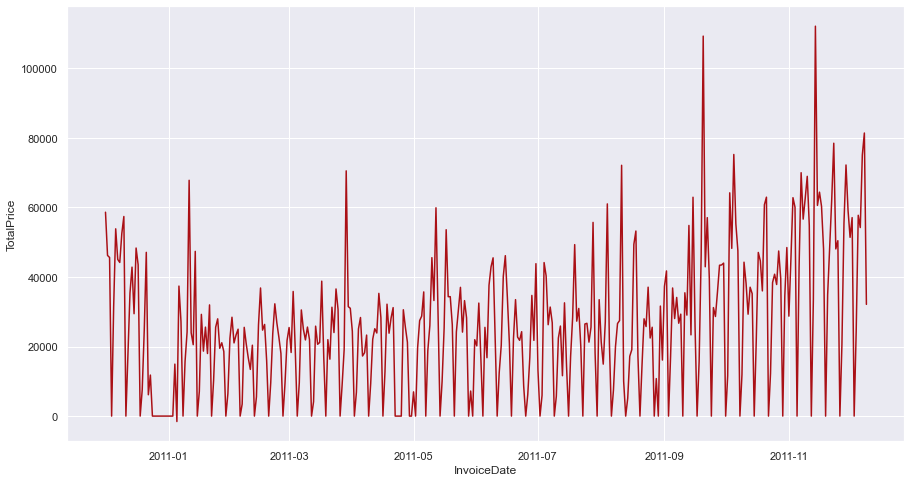

In [47]:
# 하루 당 총 가격(TotalPrice) 총합의 분포
sales_dt_ds = sales_dt.resample("D").sum()
sns.set_palette("Reds_r")
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_ds, x=sales_dt_ds.index, y="TotalPrice")

<AxesSubplot:xlabel='InvoiceDate', ylabel='UnitPrice'>

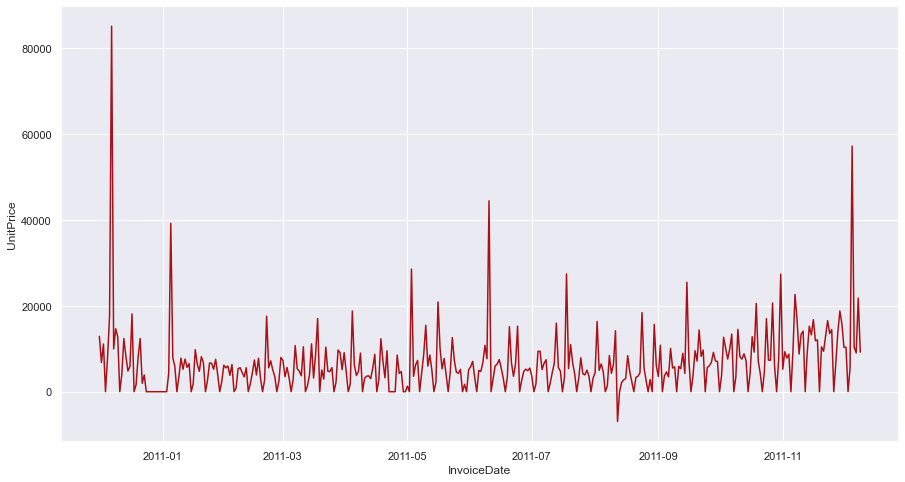

In [48]:
# 하루 당 개당 가격(UnitPrice) 총합의 분포
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_ds, x=sales_dt_ds.index, y="UnitPrice")

<AxesSubplot:xlabel='InvoiceDate', ylabel='Quantity'>

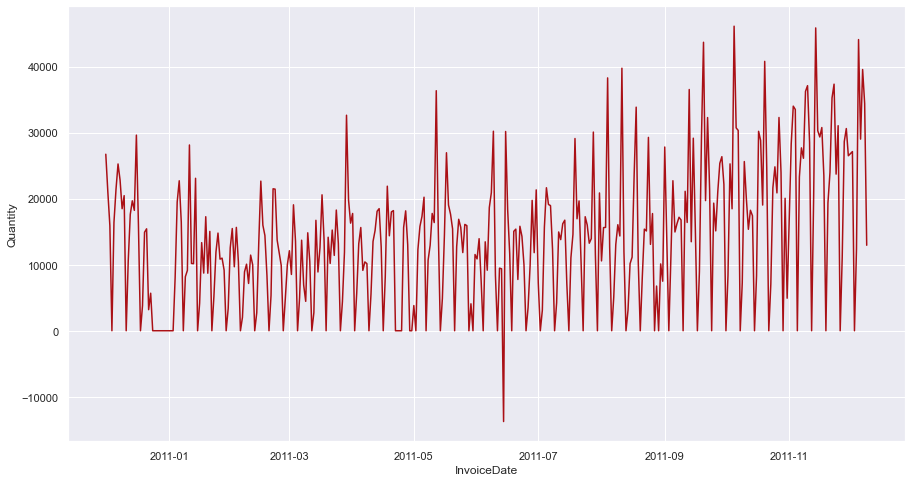

In [49]:
# 하루 당 수량(Quantity) 총합의 분포
plt.figure(figsize=(15,8))
sns.lineplot(data=sales_dt_ds, x=sales_dt_ds.index, y="Quantity")

- 2010년 12월 말 ~ 2011년 1월 초 데이터의 누락 이외에도 일정한 주기로 데이터가 누락되어있음을 확인할 수 있다.
- 일정한 패턴으로 누락된 시기는 전부 토요일 데이터이다.
- 8월 초 ~ 중순, 6월 초 ~ 중순 경에는 개당 가격과 수량이 음수인 특이한 케이스가 존재한다. 개당 가격이 음수인 경우는 대손충당금 조정에 의한 것으로 확인되었다.
- 총 가격과 수량 모두 하반기로 갈수록 증가한다. 개당 가격 또한 증가율 자체는 작지만 점점 증가는 양상을 보인다.

In [50]:
sales_dt_ds.head(20) # 토요일 데이터만 누락되었음을 확인할 수 있다.

,Quantity,UnitPrice,CustomerID,TotalPrice
InvoiceDate,,,,
2010-12-01,26736,12904.25,30821613.0,58635.56
2010-12-02,21042,6815.68,32921050.0,46207.28
2010-12-03,15913,11114.09,17091533.0,45620.46
2010-12-04,0,0.00,0.0,0.00
2010-12-05,16395,7893.17,41415197.0,31383.95
2010-12-06,21398,17678.78,31409278.0,53860.18
2010-12-07,25261,85152.09,17493785.0,45059.05
2010-12-08,22819,9978.06,31440141.0,44189.84
2010-12-09,18484,14662.63,28207132.0,52532.13


### 결론
> #### 요약 & 정리
> - 본 데이터는 대부분 영국에서 접수된 장바구니 데이터로 구성되어있으며, 토요일 데이터는 누락되어있다.
> - 연말(2010년 말, 2011년 말)에는 고객 장바구니가 비교적 많이 사용되며, 그 금액대는 평균적으로 높지 않다.
> - 연초(2011년 1월)에는 비교적 적은 상품이 장바구니에 담기지만, 그 금액대는 연말에 비해 높다. 다만 이 부분은 누락된 데이터 때문에 그래프가 왜곡되었을 가능성이 있다.
> - 2월부터 8월까지 장바구니 데이터 수에는 큰 변동이 없지만, 평균 가격의 차이가 약 15~21 사이로 차이나는 것을 보면 구매된 상품의 종류에 어느정도 차이가 존재한다고 볼 수 있다.
> - 9월 이후 12월 초(하반기 ~ 연말)까지 장바구니를 사용하는 횟수가 급격히 증가한다. 그러나 평균 금액은 9월 말 ~ 10월 초 기간에만 높고 전반적으로 낮게 형성되어있다.
> - 이와 같은 현상은 일별 개당 가격, 총 가격, 그리고 수량 그래프에서도 확인할 수 있다. 일반적으로 개당 가격이 압도적으로 높은 케이스를 포함했을 때 총 가격 평균이 높아진다는 사실을 알 수 있다.

> #### 한계
> - 일부 기간의 데이터 전체가 누락되어있어 데이터 분석 결과를 완전히 신뢰할 수 없다.
> - 데이터 전처리 과정에서 제외한 데이터(Description이 결측치인 경우)를 대체할 수 있는 방법을 찾아내지 못했다.
> - 주어진 데이터에 대한 구체적인 정보가 없기 때문에 분석이 일부 잘못되었을 가능성이 있다.

> #### 느낀 점
> - 이번 데이터 분석 보고서를 작성하면서 학회 스터디 세션에서 배운 것들을 적극적으로 활용할 수 있었다.
> - 모르는 부분은 구글링을 통해 해결하면서 많이 배울 수 있었다.
> - 특히 시계열 데이터를 본격적으로 분석한 것이 처음이라서 다양한 기법을 사용하지는 못했지만, 좋은 경험이 되었다.